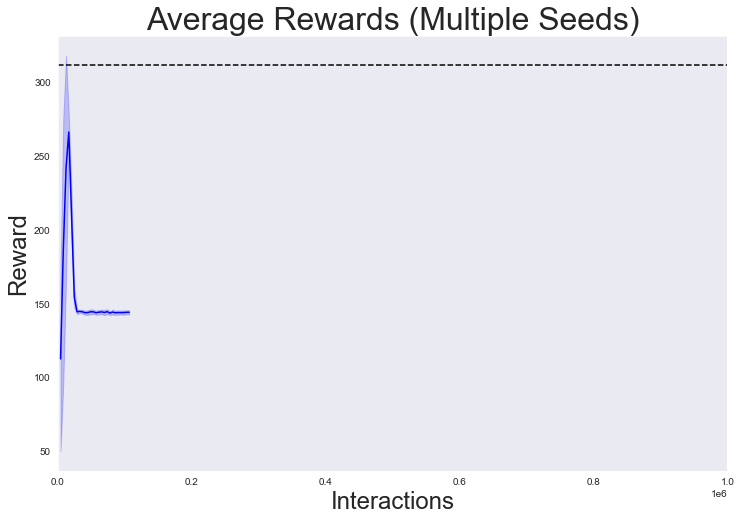

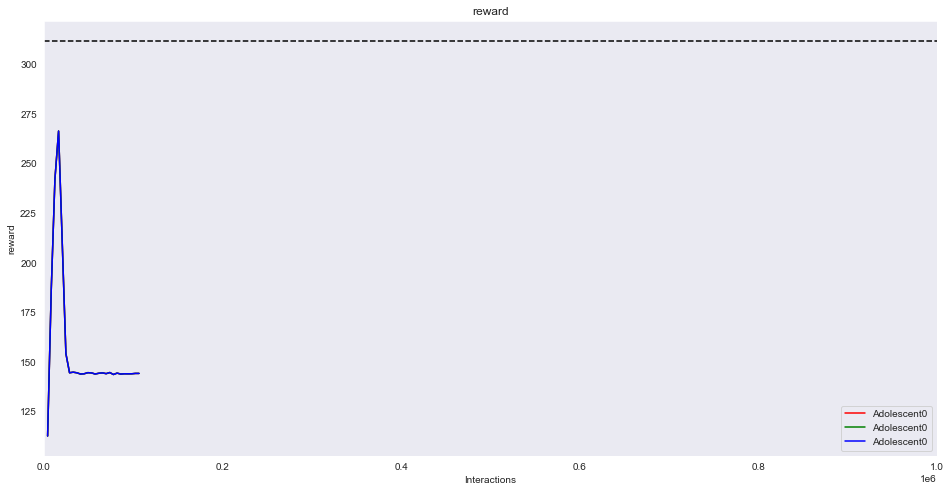

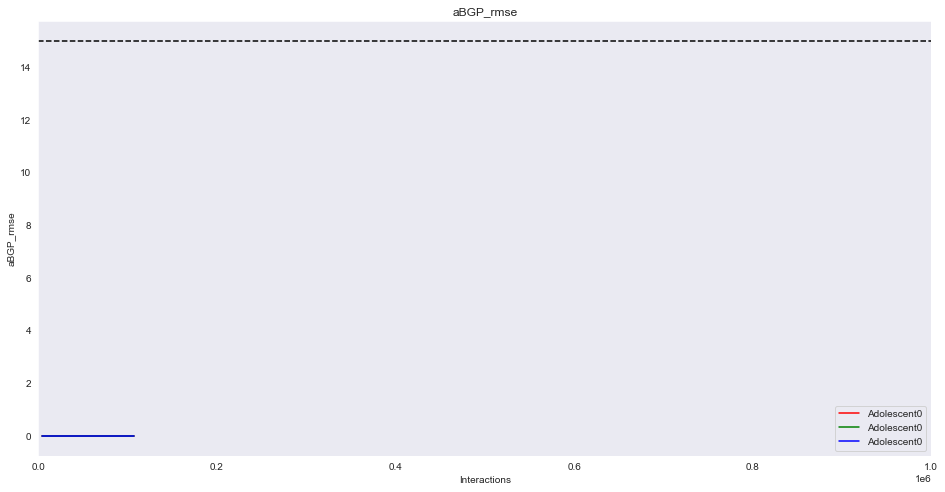

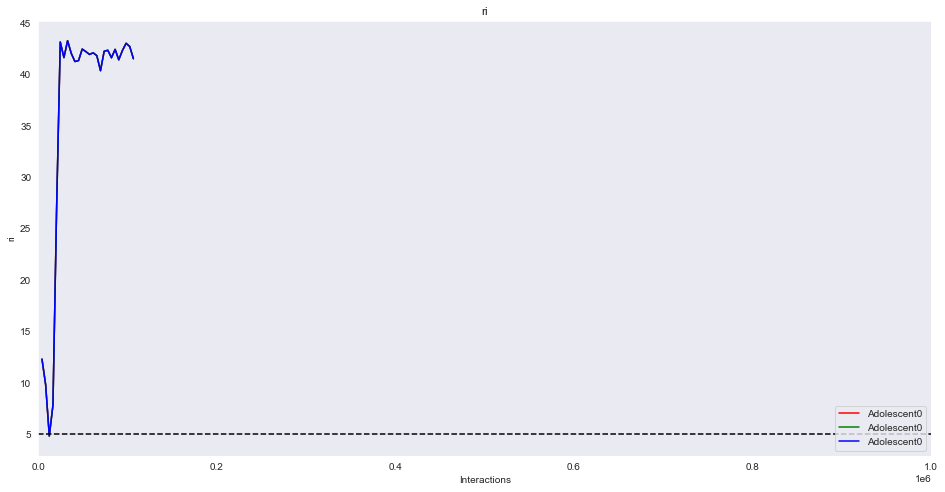

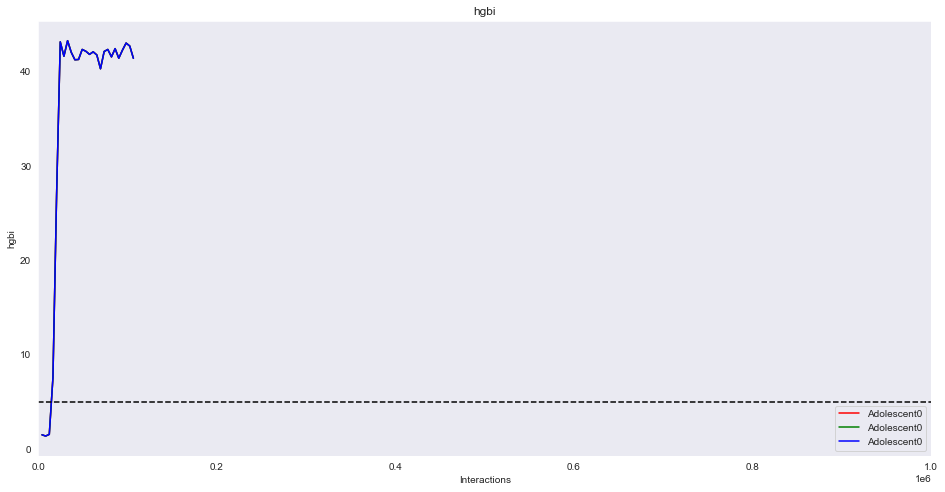

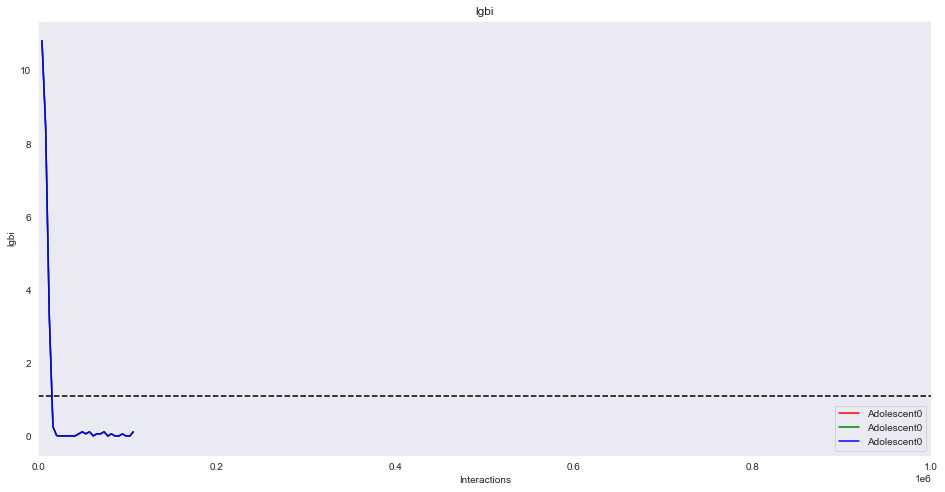

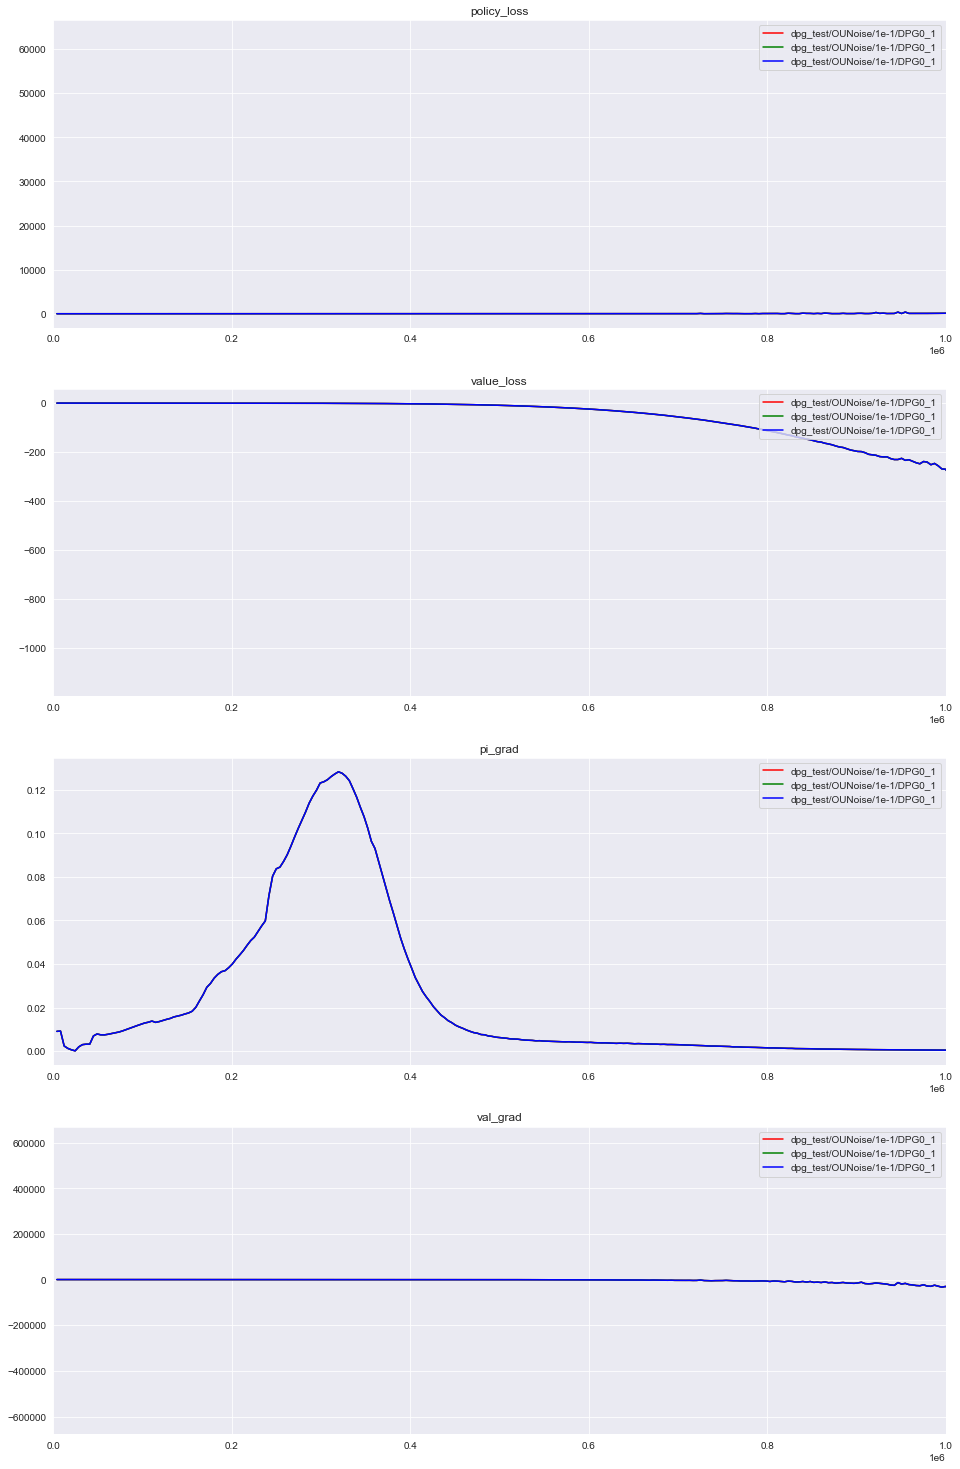

In [32]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
# MAIN_PATH = config('MAIN_PATH')
MAIN_PATH = 'C:/Users/davet/Desktop/Thesis/G2P2C/'
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 

# FOLDER = 'nci/May12/adult_easy/'
# ALGO = 'G'
# SUBJECT = '6'
# PATH = FOLDER+ALGO+SUBJECT
# COHORT = 'Adult'

FOLDER = 'dpg_test/OUNoise/1e-1/'
ALGO = 'DPG'#'DDPG'
SUBJECT = '0'
PATH = FOLDER+ALGO+SUBJECT
COHORT = 'Adolescent'

LABEL = COHORT+SUBJECT

exp1 = ExperimentVisualise(id=PATH+'_1', version=1.1, plot_version=1, test_seeds=5000)
exp2 = ExperimentVisualise(id=PATH+'_1', version=1.1, plot_version=1, test_seeds=5000)
exp3 = ExperimentVisualise(id=PATH+'_1', version=1.1, plot_version=1, test_seeds=5000)

# plot the graphs
command = []
dis_len = 1.0 * 1000000
disp_arr = display_commands_v2(command)
exp_vis = {
             '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":LABEL}, 
             '2':{ "id":exp2, "color":'g',"show": disp_arr[2], "label":LABEL},  
             '3':{ "id":exp3, "color":'b',"show": disp_arr[3], "label":LABEL}, 
}
# average metric
plot_testing_average_metric(exp_vis, [['1', '2', '3']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)

#individual seed metrics
plot_testing_metric(exp_vis, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=False, label=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)
#plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='cBGP_rmse', goal=10, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='normo', goal=70, fill=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='ri', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='hgbi', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='lgbi', goal=1.1, fill=False)
#plot_training_logs(exp_vis, dis_len, version=3)

params = ['policy_loss', 'value_loss', 'pi_grad', 'val_grad'] #, 'pi_loss'
plot_training_logs(mode='ppo', exp_dict=exp_vis, dis_len=dis_len, params=params)
#params = ['pi_aux_grad'] #'pi_aux_loss', 'vf_aux_loss', vf_aux_grad 
#plot_training_logs(mode='aux', exp_dict=exp_vis, dis_len=250, params=params)
#params = ['plan_grad', 'plan_loss'] 
# plot_training_logs(mode='planning', exp_dict=exp_vis, dis_len=250, params=params)    


 Experiment summary...
{'epi': {23: 25}, 't': {23: 221}, 'reward': {23: 141.15652}, 'normo': {23: 17.647058823529413}, 'hypo': {23: 0.0}, 'sev_hypo': {23: 0.0}, 'hyper': {23: 37.55656108597285}, 'lgbi': {23: 0.0}, 'hgbi': {23: 36.109493}, 'ri': {23: 36.109493}, 'sev_hyper': {23: 44.796380090497735}, 'aBGP_rmse': {23: 0}, 'cBGP_rmse': {23: 0}}
{'epi': {23: 25}, 't': {23: 256}, 'reward': {23: 145.88675}, 'normo': {23: 18.75}, 'hypo': {23: 0.0}, 'sev_hypo': {23: 0.0}, 'hyper': {23: 27.734375}, 'lgbi': {23: 0.0}, 'hgbi': {23: 42.99063}, 'ri': {23: 42.99063}, 'sev_hyper': {23: 53.515625}, 'aBGP_rmse': {23: 0}, 'cBGP_rmse': {23: 0}}
{'epi': {23: 25}, 't': {23: 261}, 'reward': {23: 146.21156}, 'normo': {23: 14.559386973180075}, 'hypo': {23: 0.0}, 'sev_hypo': {23: 0.0}, 'hyper': {23: 30.65134099616858}, 'lgbi': {23: 0.0}, 'hgbi': {23: 43.957382}, 'ri': {23: 43.957382}, 'sev_hyper': {23: 54.78927203065134}, 'aBGP_rmse': {23: 0}, 'cBGP_rmse': {23: 0}}
{'epi': {23: 25}, 't': {23: 257}, 'reward':

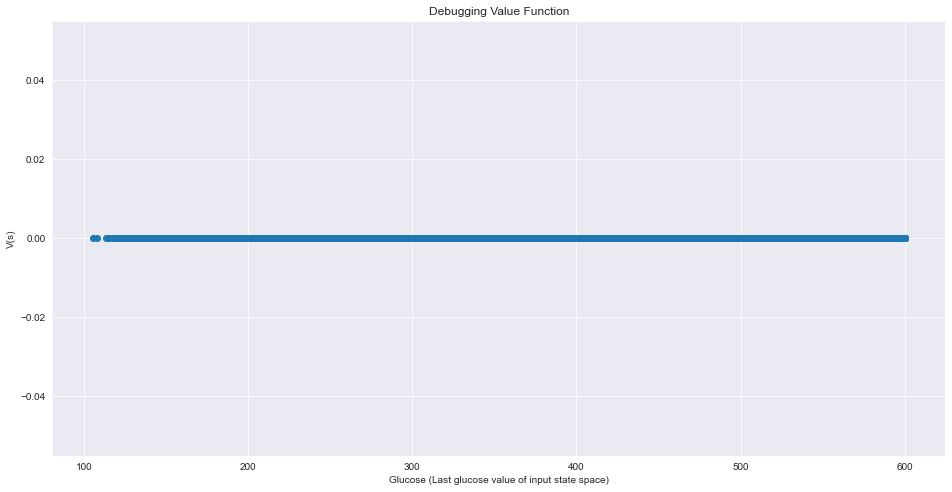

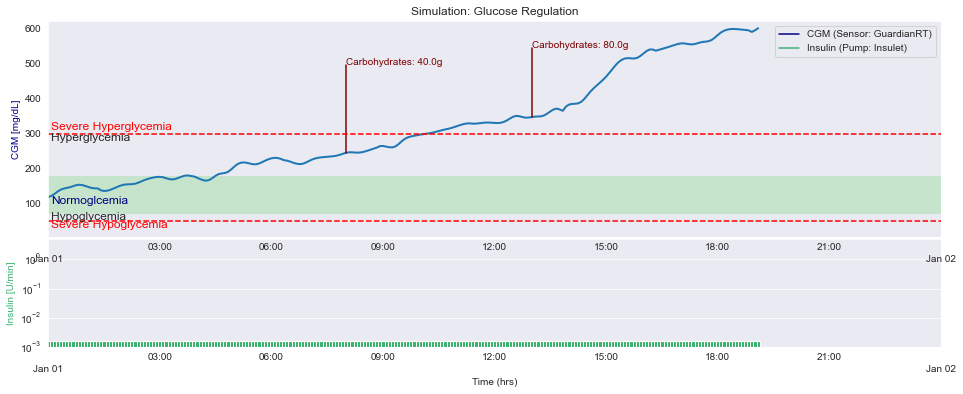

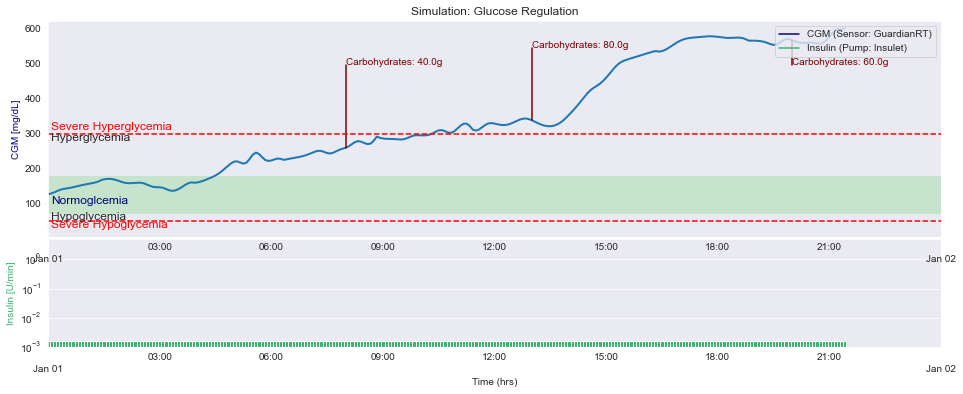

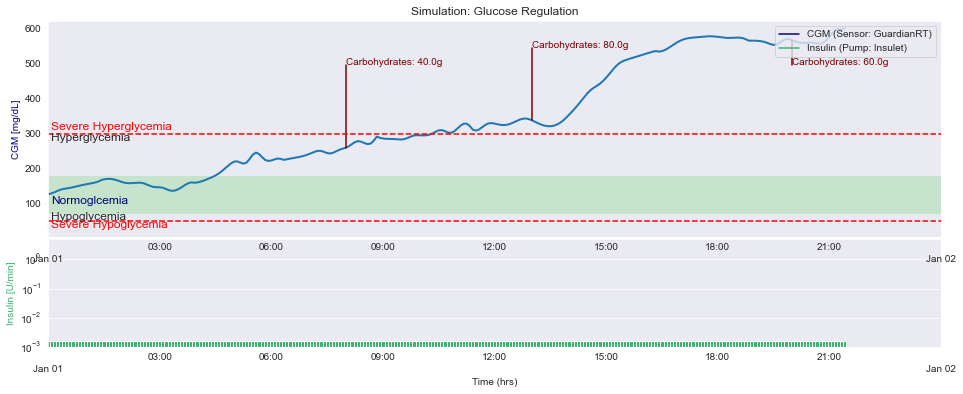

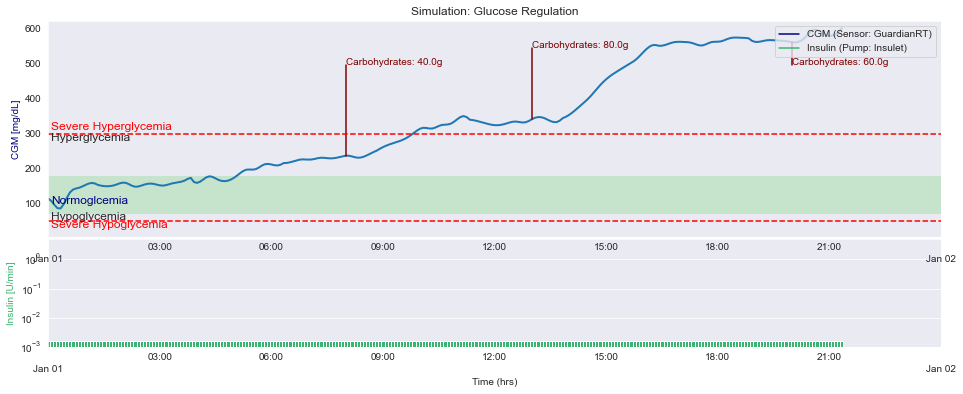

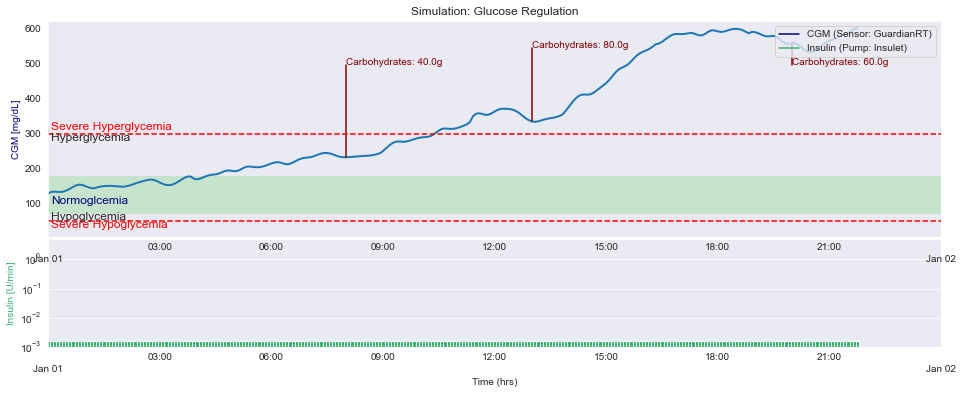

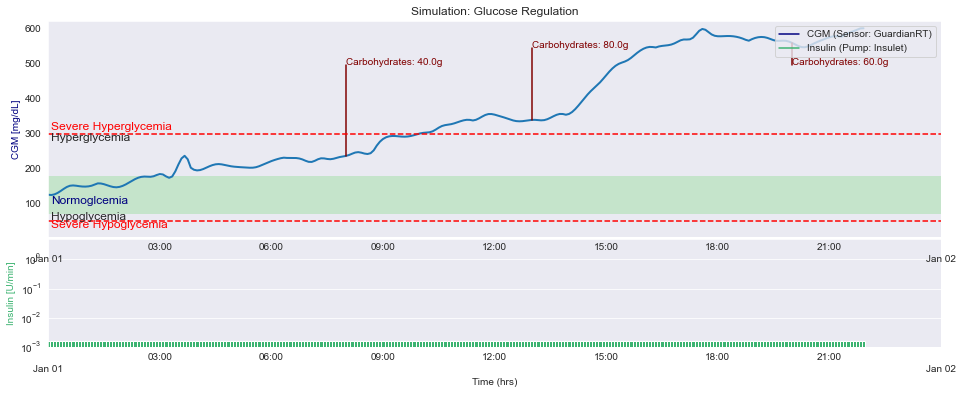

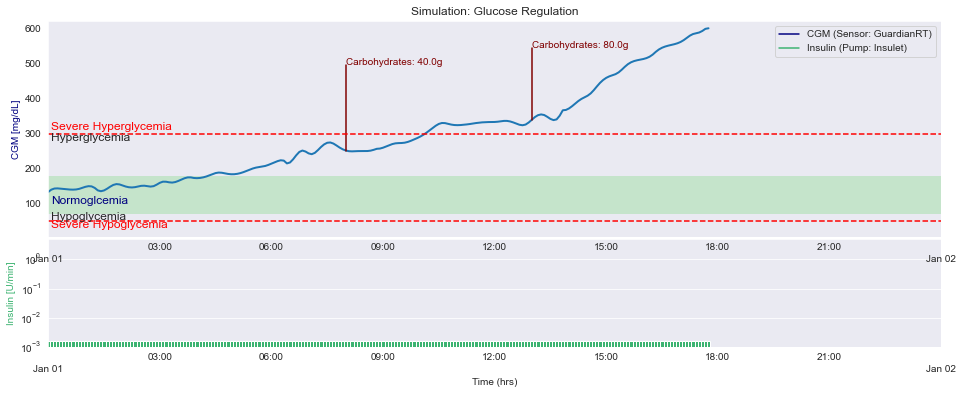

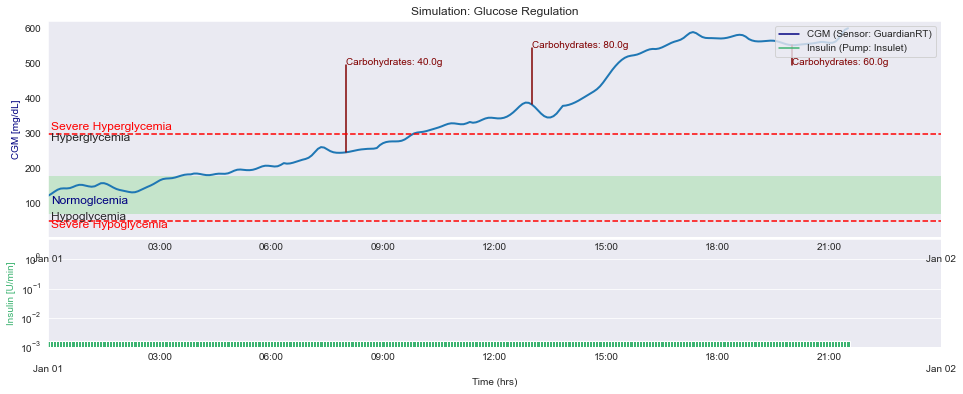

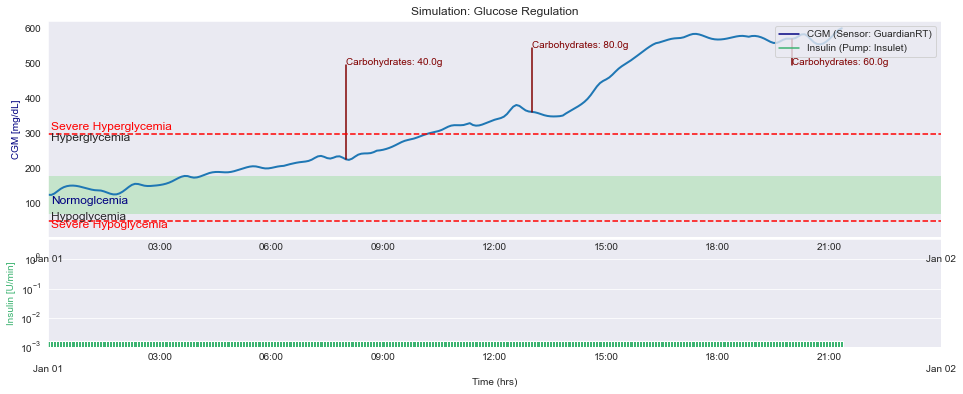

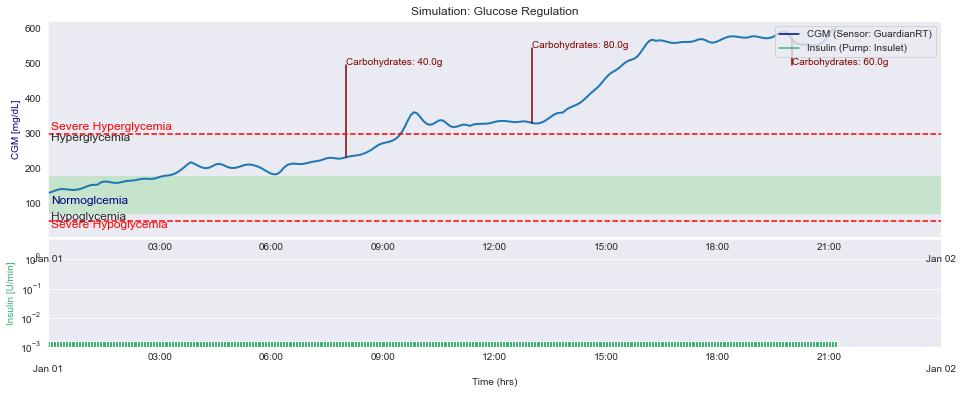

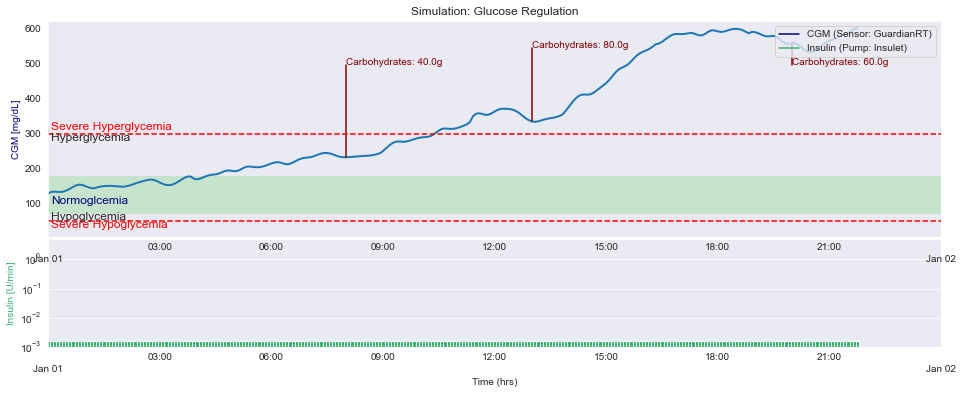

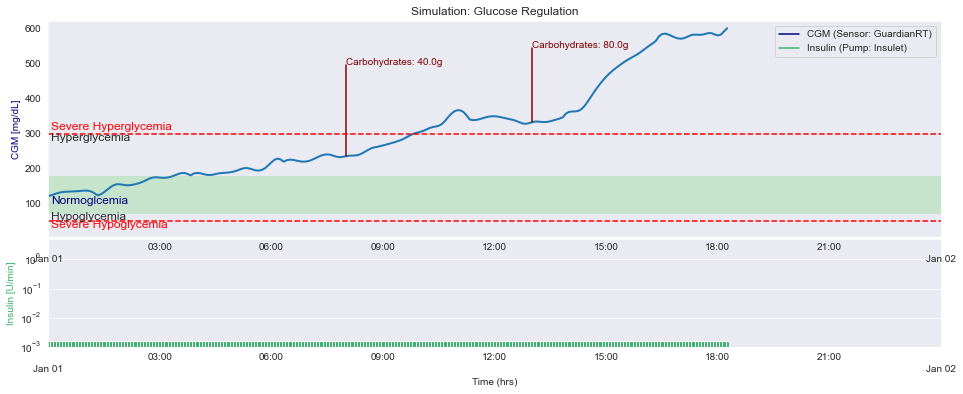

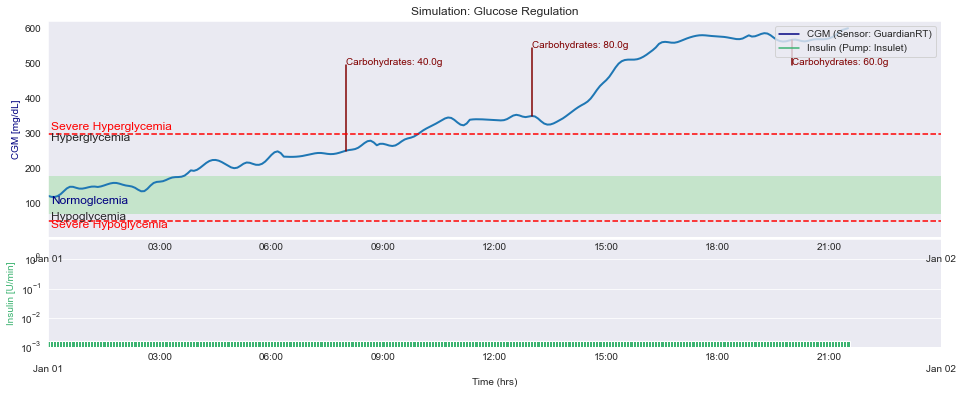

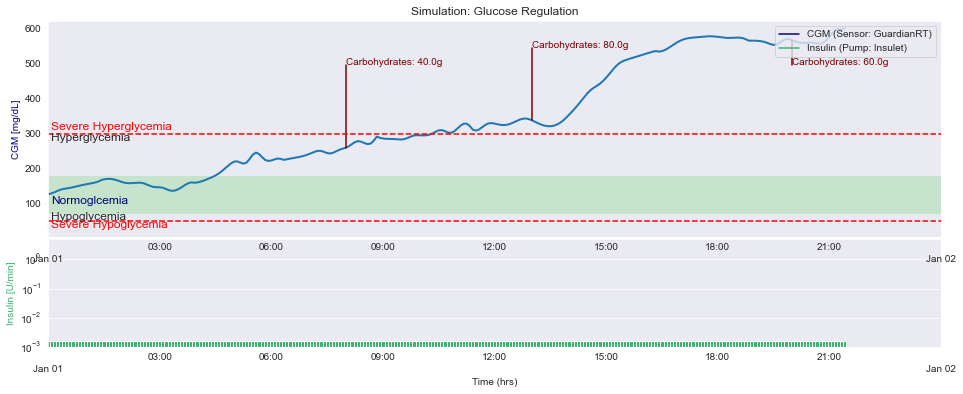

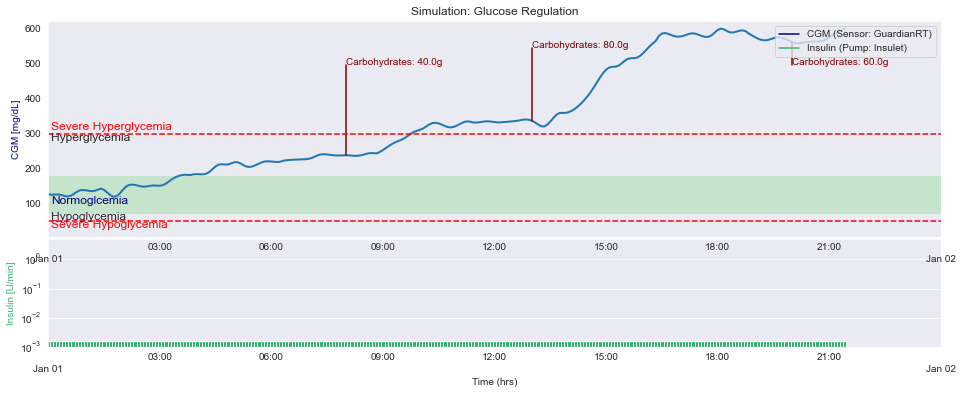

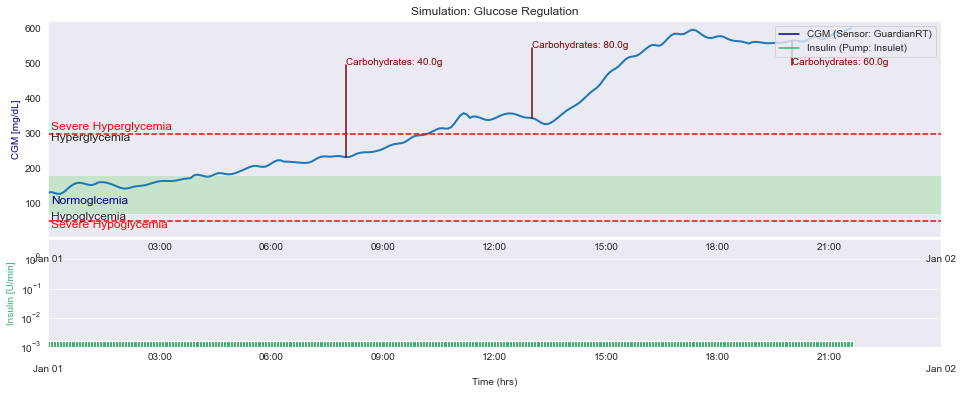

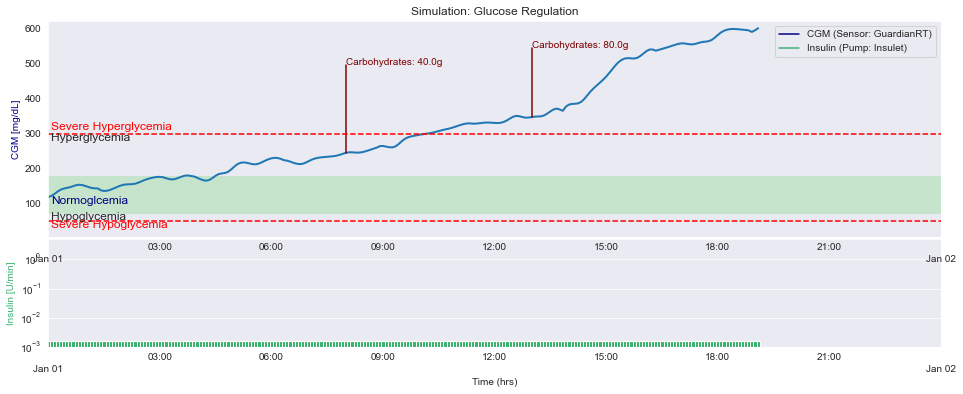

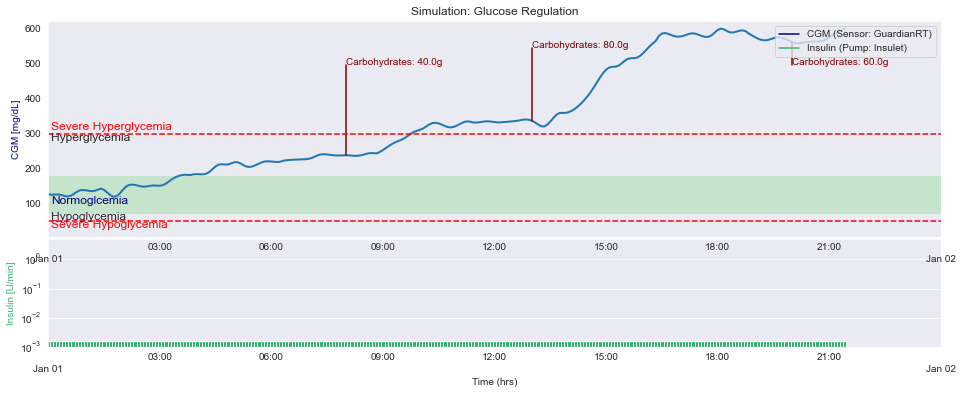

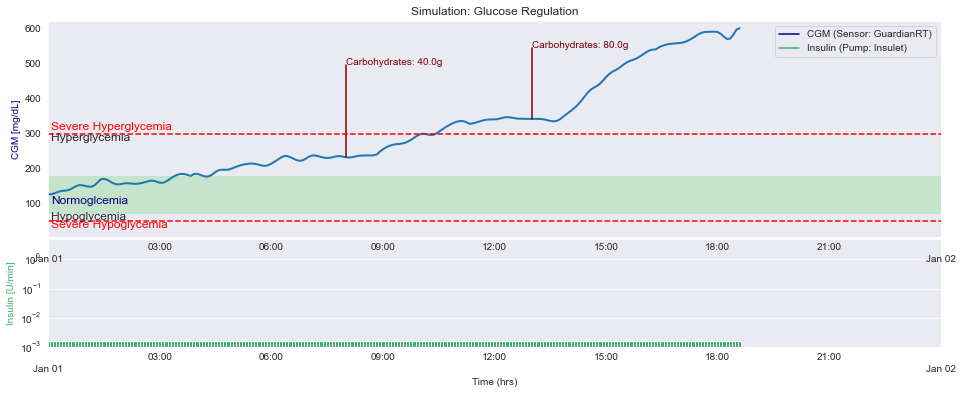

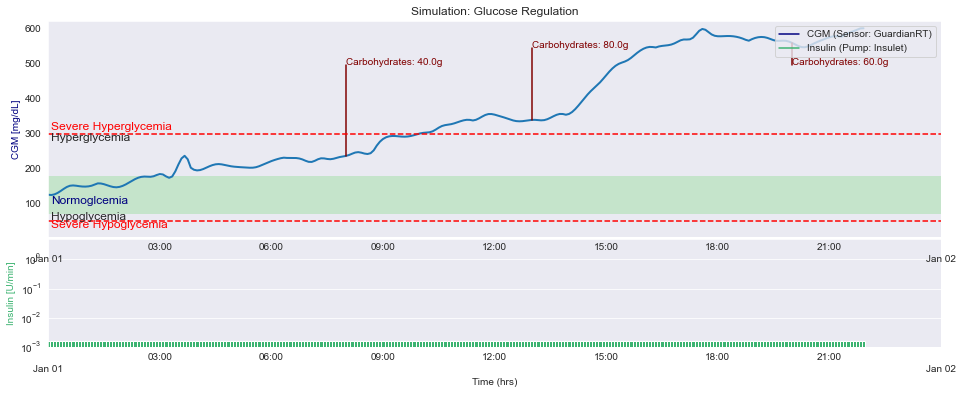

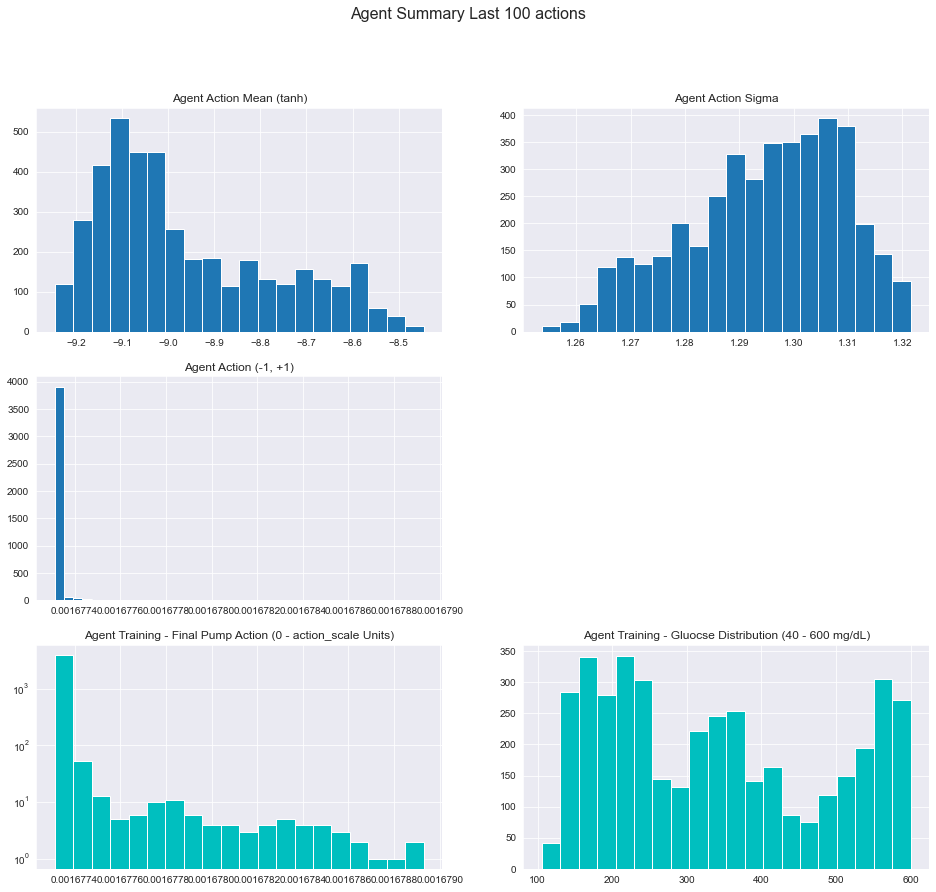

In [31]:
## debugging a given experiment
target_exp = exp3
latest_epi = target_exp.get_summary()
target_epi = latest_epi#10   latest_epi
plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=target_epi)
plot_training_action_summary(target_exp, horizon=256)

In [39]:
exp_vis['1']['id'].get_training_logs()

,coeff_loss,policy_loss,q1_loss,q2_loss,ent_coeff,pi_grad,q1_grad,g2_grad,coeff_grad,steps
0,3.505393,0.0,0.0,0.0,0.0,0.006587,0.0,0.0,1.827036,4096
1,4.359940,0.0,0.0,0.0,0.0,0.006600,0.0,0.0,3.477499,8192
2,1.765277,0.0,0.0,0.0,0.0,0.006692,0.0,0.0,5.610197,12288
3,5.246005,0.0,0.0,0.0,0.0,0.006722,0.0,0.0,7.126663,16384
4,6.124338,0.0,0.0,0.0,0.0,0.006768,0.0,0.0,8.499674,20480
...,...,...,...,...,...,...,...,...,...,...
258,0.529935,0.0,0.0,0.0,0.0,0.022860,0.0,0.0,22.094358,1060864
259,1.428938,0.0,0.0,0.0,0.0,0.023057,0.0,0.0,21.879616,1064960
260,2.341465,0.0,0.0,0.0,0.0,0.023423,0.0,0.0,21.691840,1069056
261,3.263218,0.0,0.0,0.0,0.0,0.023792,0.0,0.0,21.531128,1073152


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/davet/Desktop/Thesis/G2P2C//results/embc14_real/real.csv'